# Avacado Project


## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States.

## Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

## Inspiration /Label
Your task is to make a model that can consider the data provided and predict the Average Price.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import DataSet: 

df = pd.read_csv(r"E:\datatrained\avocado.csv")
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

df.columns = ['Date', 'Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 
              'PLU_4770','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year','Region']

df.head()

,Date,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18249 non-null  object 
 1   Average_Price  18249 non-null  float64
 2   Total_Volume   18249 non-null  float64
 3   PLU_4046       18249 non-null  float64
 4   PLU_4225       18249 non-null  float64
 5   PLU_4770       18249 non-null  float64
 6   Total_Bags     18249 non-null  float64
 7   Small_Bags     18249 non-null  float64
 8   Large_Bags     18249 non-null  float64
 9   XLarge_Bags    18249 non-null  float64
 10  Type           18249 non-null  object 
 11  Year           18249 non-null  int64  
 12  Region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.drop(columns='Date', inplace=True)
df

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [6]:
#Observe the given DataSet:

df.describe()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


#### Plot a couple of plots for future

In [7]:
ava_percent = (df["Type"].value_counts()/df.shape[0])*100
print(ava_percent)

conventional    50.00822
organic         49.99178
Name: Type, dtype: float64


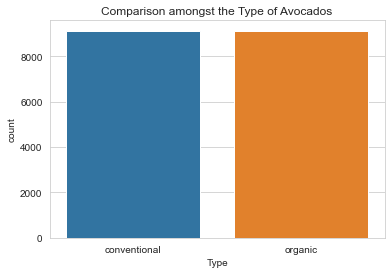

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Type", data=df).set(title='Comparison amongst the Type of Avocados')
plt.show()

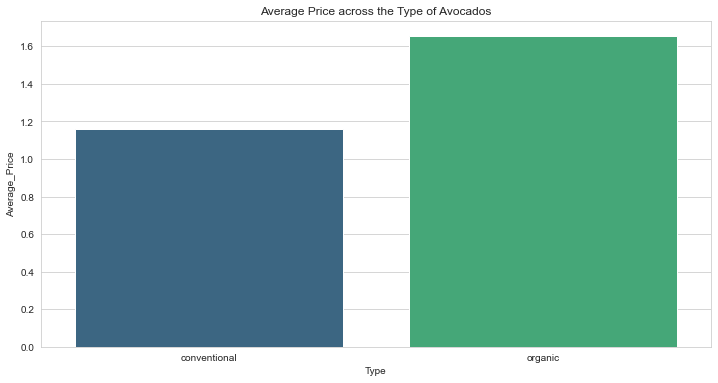

In [13]:
# Relation between Average Price & type of avacado

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Type", y="Average_Price", data=df, palette="viridis", ci=None, orient="v").set(title='Average Price across the Type of Avocados')
plt.show()

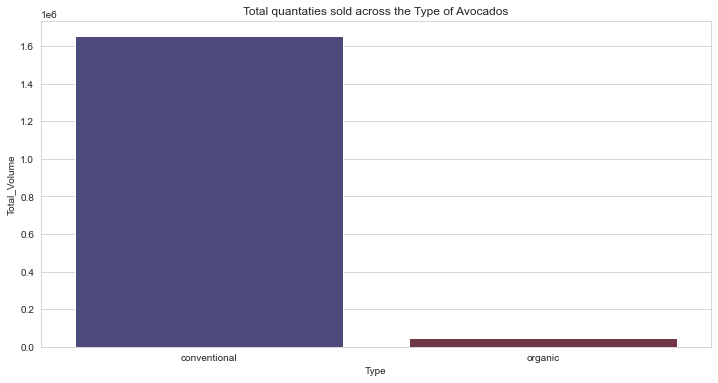

In [14]:
# Relation between quantity & type of avacado


plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Type", y="Total_Volume", data=df, palette="icefire", ci=None, orient="v").set(title='Total quantaties sold across the Type of Avocados')
plt.show()

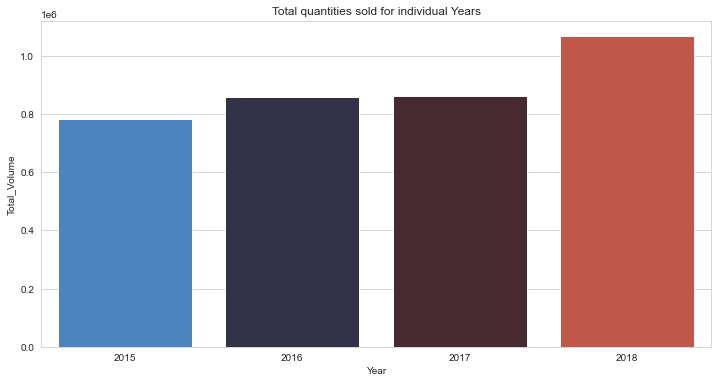

In [15]:
# Relation between quantity & sale of avacado in year:


plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Year", y="Total_Volume", data=df, palette="icefire", ci=None, orient="v").set(title='Total quantities sold for individual Years')
plt.show()

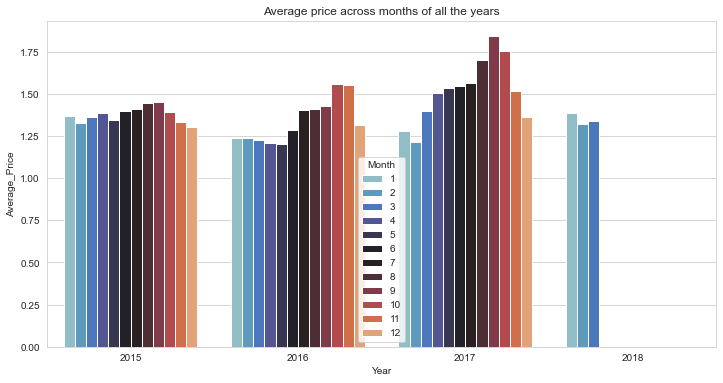

In [16]:
# Relation between Average Price & sale of avacado in specific month of year:

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Year", y="Average_Price", hue="Month", data=df, palette="icefire", ci=None, orient="v").set(title='Average price across months of all the years')
plt.show()

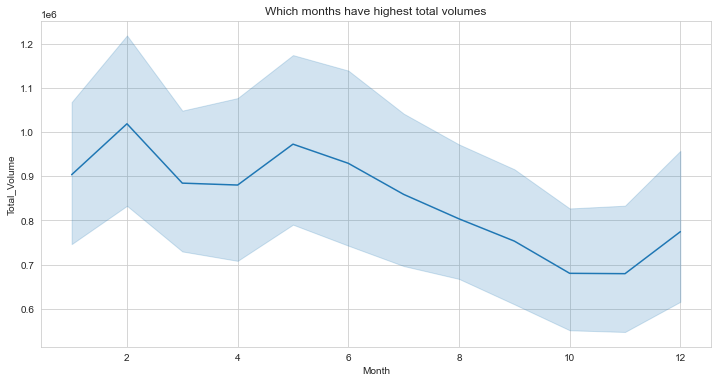

In [17]:
# Relation between total volum & month of year:


plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Month", y="Total_Volume", data=df, palette="icefire").set(title='Which months have highest total volumes')
plt.show()

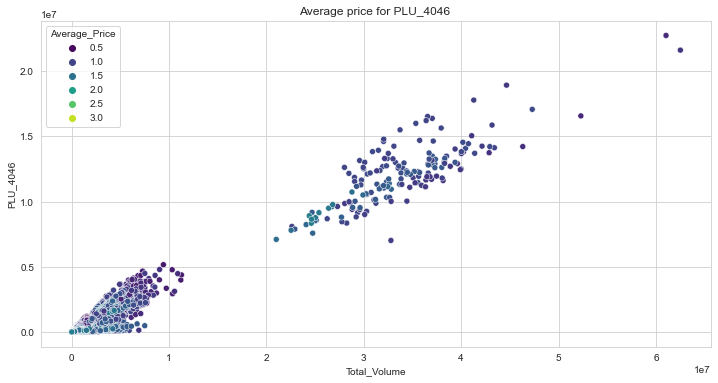

In [18]:
# Relationship between the avocado type "PLU_4046" and the total volumes:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4046", hue="Average_Price", palette="viridis").set(title='Average price for PLU_4046 ')
plt.show()

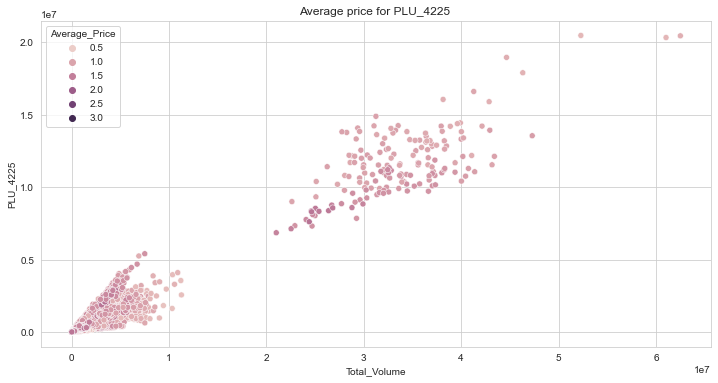

In [19]:
# Relationship between the avocado type "PLU_4046" and the total volumes:


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4225", hue="Average_Price").set(title='Average price for PLU_4225 ')
plt.show()

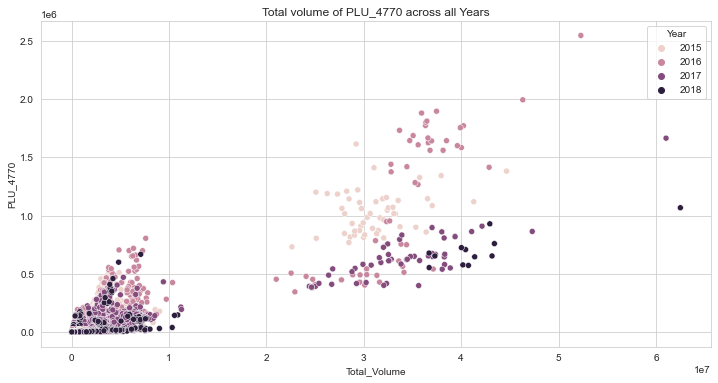

In [21]:
# Relationship between the avocado type "PLU_4770" and the years:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4770", hue="Year").set(title='Total volume of PLU_4770 across all Years')
plt.show()

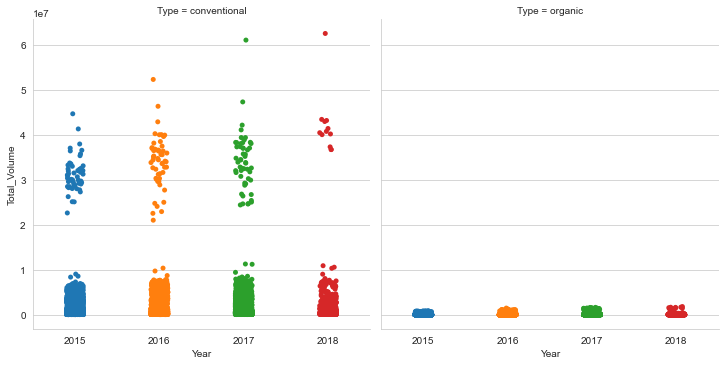

In [22]:
# Relation between total volum & year:

g = sns.catplot(x="Year", y="Total_Volume", col="Type", data=df)

<Figure size 864x432 with 0 Axes>

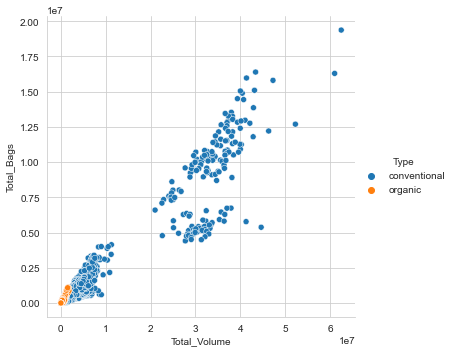

In [25]:
# Relation of quantities of sales avocados increase:

plt.figure(figsize=(12, 6))
sns.relplot(data=df, x="Total_Volume", y="Total_Bags", hue="Type")
plt.show()

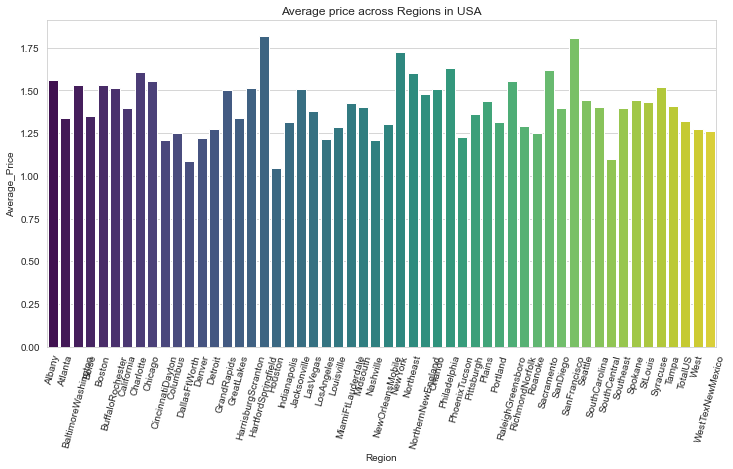

In [26]:
# Average Price :

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Region", y="Average_Price", data=df, palette="viridis", ci=None, orient="v").set(title='Average price across Regions in USA')
plt.xticks(rotation=75)
plt.show()

### Preprocessing

In [27]:
df.columns

Index(['Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year',
       'Region', 'Month', 'Day'],
      dtype='object')

In [28]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [29]:
df_new1 = lab_enc.fit_transform(df["Type"])
df_new2 = lab_enc.fit_transform(df["Region"])

In [30]:
df["Type"] = df_new1
df["Region"] = df_new2

In [31]:
df.head()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


#### Distribution of all the columns:

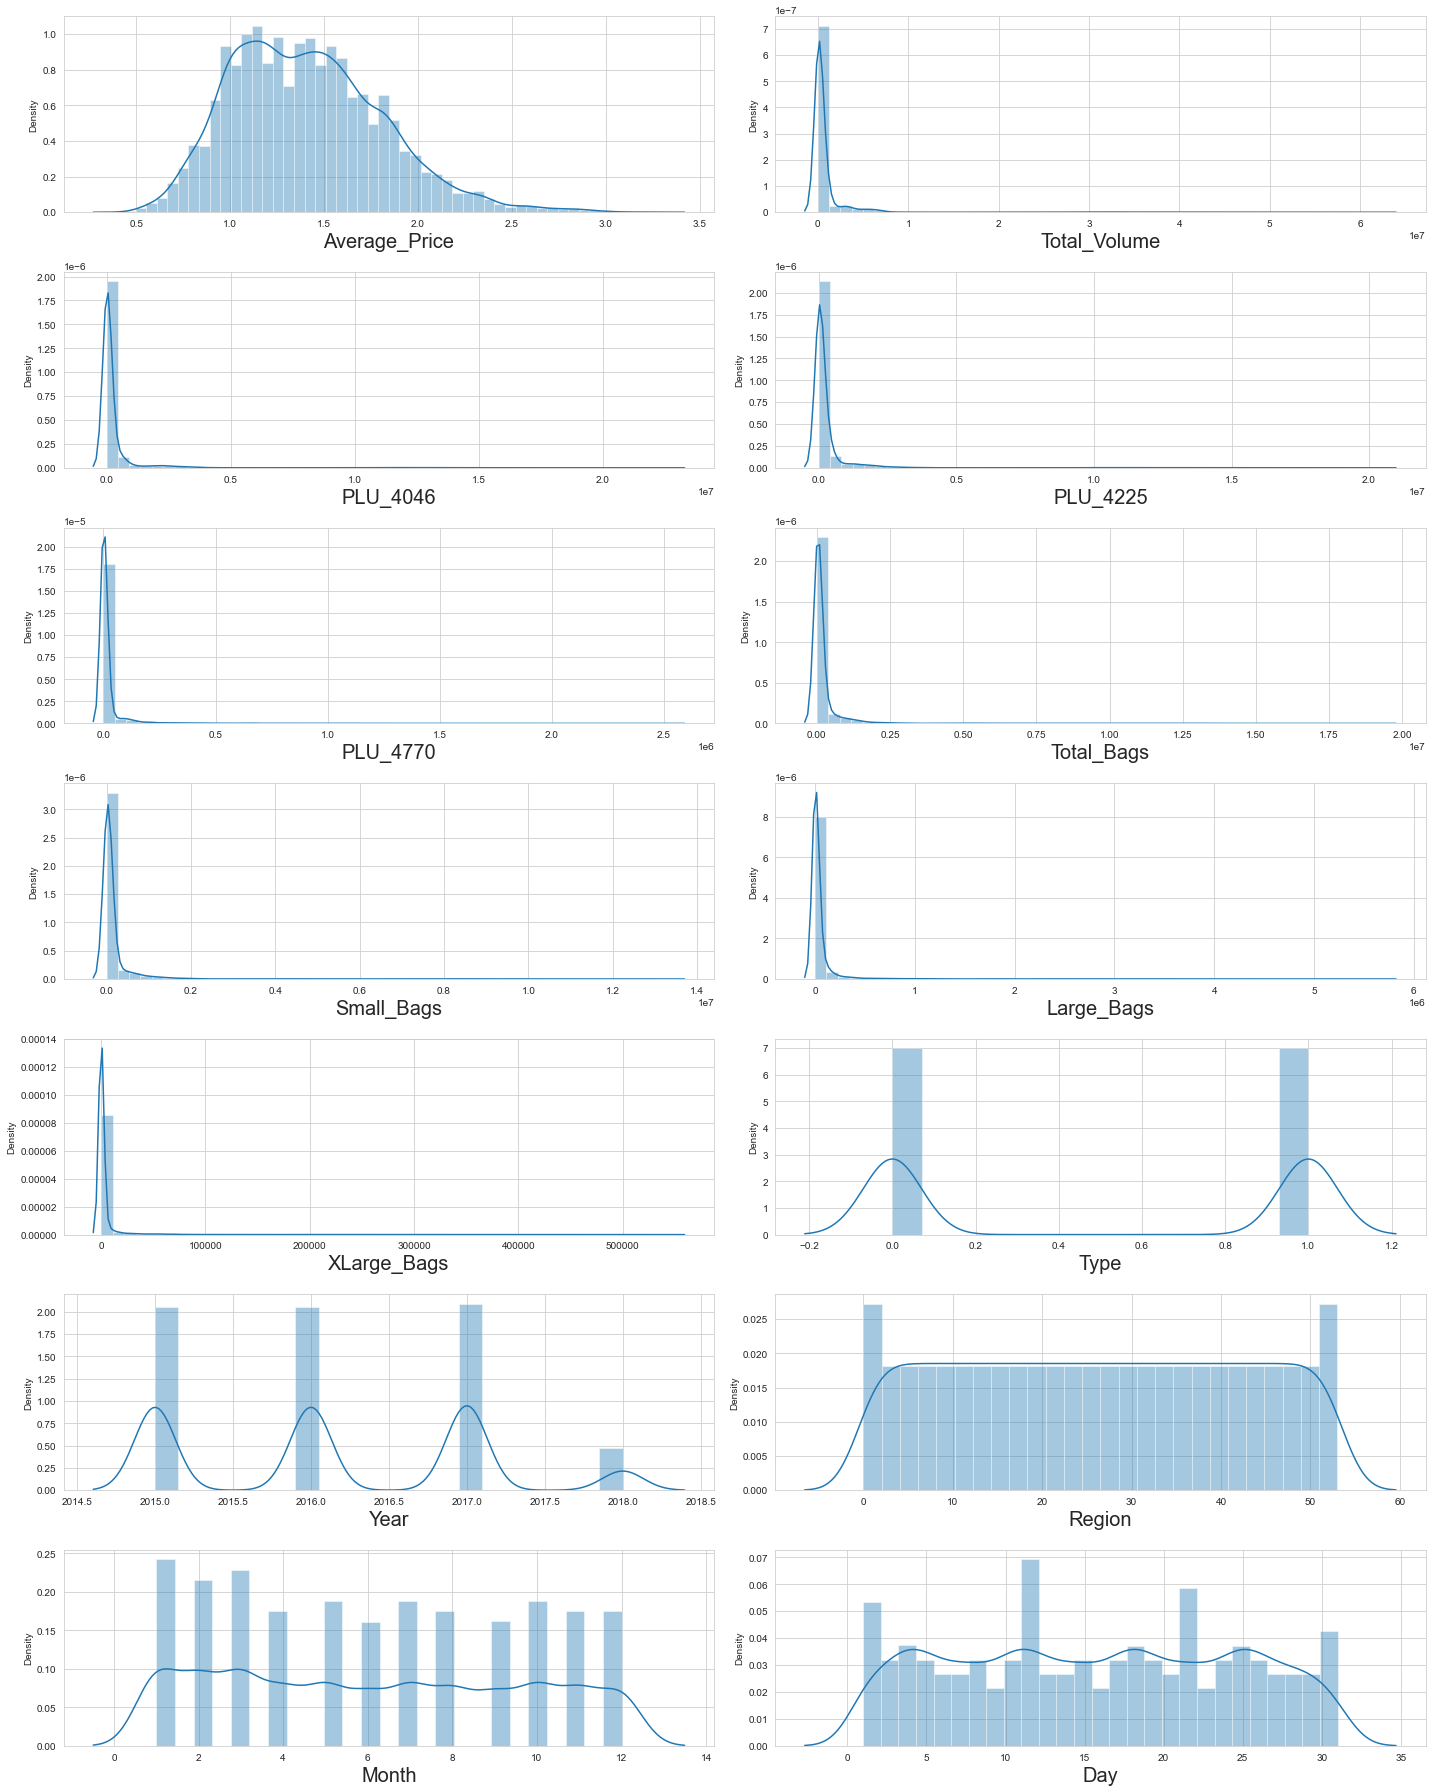

In [32]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Applying Z-score

In [33]:
from scipy.stats import zscore

z_score = zscore(df[['Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,0.509433,2016.137669,26.103110,6.178347,15.685400
std,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,0.499925,0.940239,15.396005,3.539935,8.775959
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,1.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,1.000000,2017.000000,39.000000,9.000000,23.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,53.000000,12.000000,31.000000


Normally distributed Dataset:

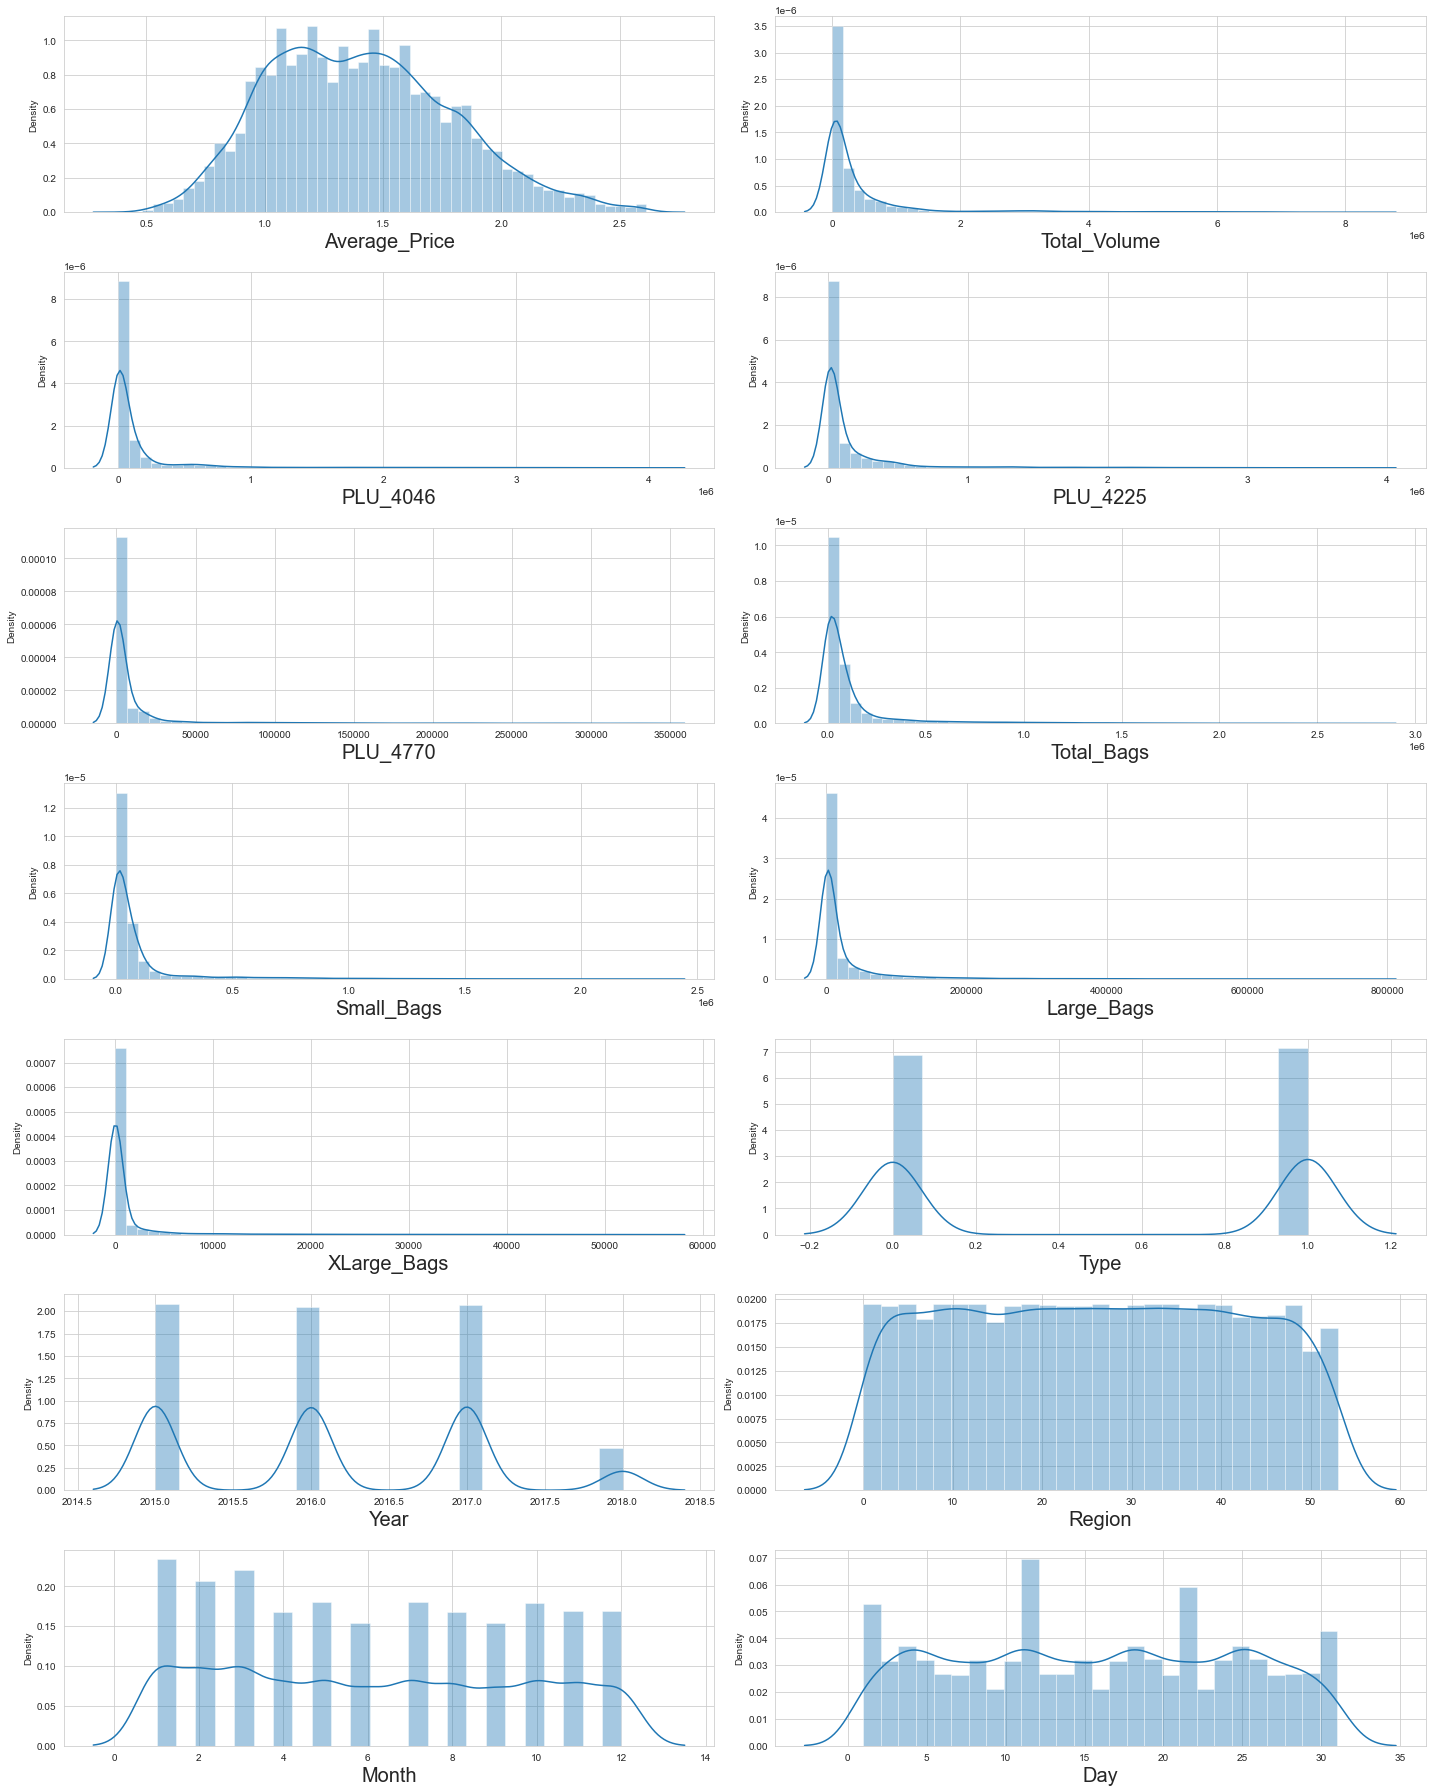

In [34]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Correlation 

In [35]:
corr_matrix = df.corr()
corr_matrix["Average_Price"].sort_values(ascending=False)

Average_Price    1.000000
Type             0.613150
Month            0.149502
Year             0.091704
Day              0.026819
Region          -0.003242
XLarge_Bags     -0.152669
PLU_4770        -0.243465
PLU_4225        -0.243988
Large_Bags      -0.270915
Small_Bags      -0.275771
Total_Bags      -0.297323
Total_Volume    -0.332056
PLU_4046        -0.333577
Name: Average_Price, dtype: float64

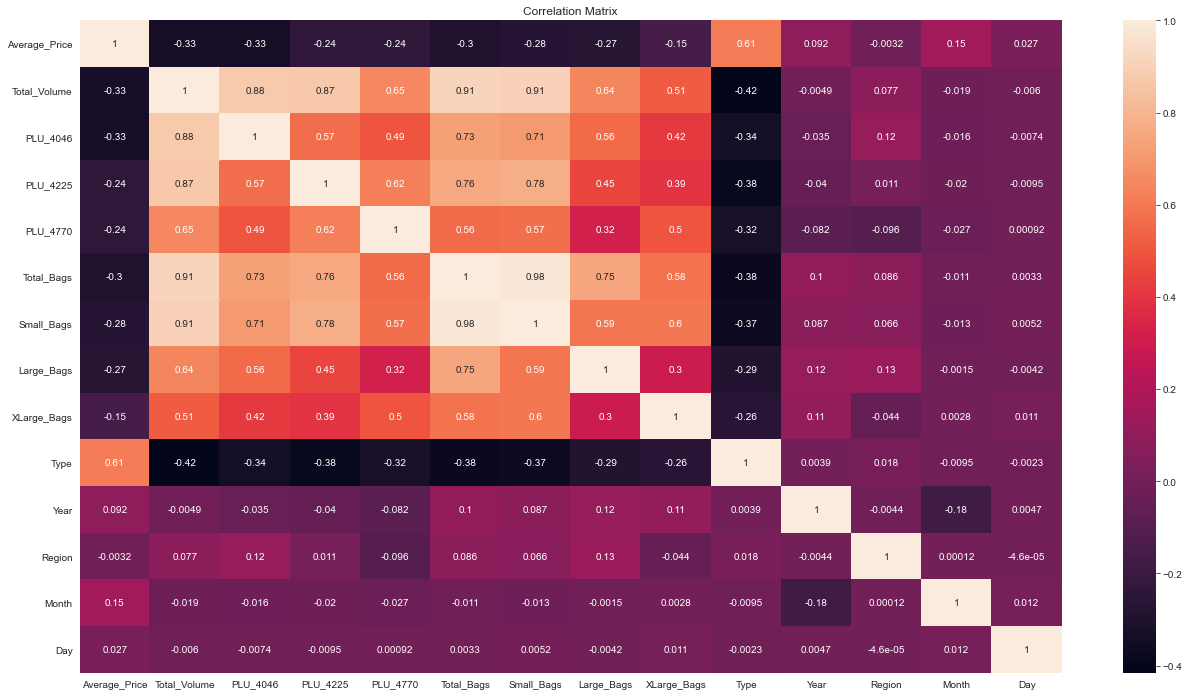

In [36]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Splitting  Dataset:

In [37]:
x = df.drop(columns = ["Average_Price"], axis=1)
y = df["Average_Price"]

### skewness of dataset:

In [38]:
x.skew()

Total_Volume    3.767138
PLU_4046        4.909848
PLU_4225        4.455745
PLU_4770        5.117170
Total_Bags      4.066771
Small_Bags      4.222706
Large_Bags      5.053434
XLarge_Bags     6.135607
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [39]:
#Storing the list of features having skewness in a variable:

features =["Total_Volume", "PLU_4046", "PLU_4225", "PLU_4770", "Total_Bags", "Small_Bags", "Large_Bags", "XLarge_Bags"]

In [40]:
# Using Standard Scaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
# Using PowerTransformer:

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


In [42]:
# Now Check the skewness of dataset:

x.skew()

Total_Volume   -0.008642
PLU_4046       -0.039282
PLU_4225       -0.044675
PLU_4770        0.024168
Total_Bags     -0.022204
Small_Bags     -0.024405
Large_Bags     -0.110913
XLarge_Bags     0.853758
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

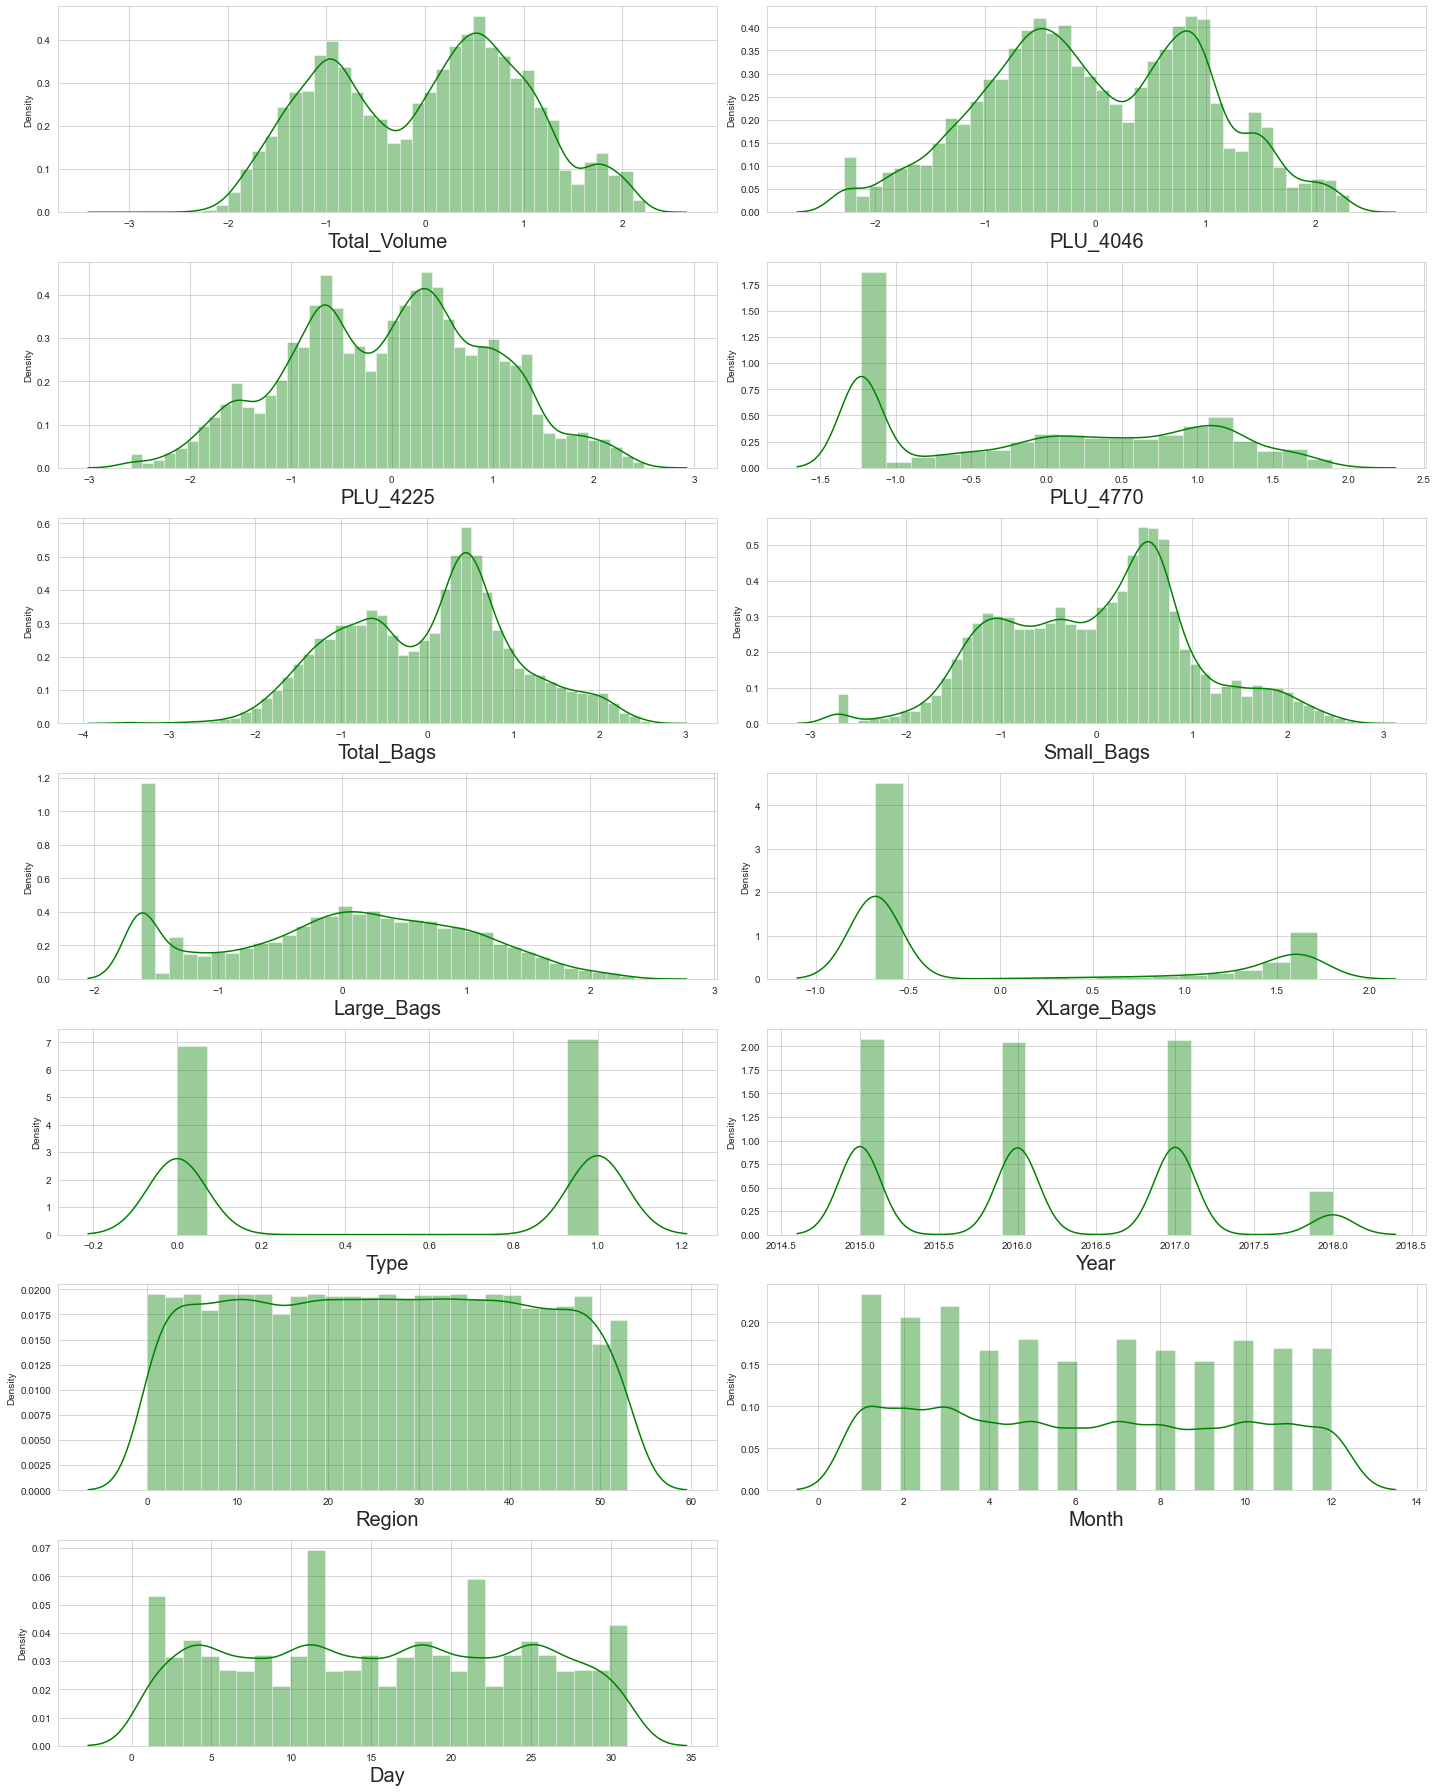

In [43]:
# Distribution after skewness is removed:

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Finding  VIF :

In [44]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,4.127969e+08,Total_Volume
1,7.777070e+07,PLU_4046
2,6.410838e+07,PLU_4225
3,4.787390e+05,PLU_4770
4,1.924615e+13,Total_Bags
5,1.275807e+13,Small_Bags
6,1.290985e+12,Large_Bags
7,6.647527e+09,XLarge_Bags
8,1.232129e+00,Type
9,1.132830e+00,Year


In [45]:
# Spliting the dataset:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

### Create multi output classification models: 

#### DecisionTreeRegressor

In [46]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.1338632930513595
Mean Squared Error (MSE):  0.04156465256797583
Root Mean Squared Error (RMSE):  0.20387410960682534


#### RandomForestRegressor

In [47]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9829509711688414
Mean Absolute Error (MAE):  0.0946554003021148
Mean Squared Error (MSE):  0.017773808561178245
Root Mean Squared Error (RMSE):  0.1333184479401791


#### KNeighborsRegressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7106105710836546
Mean Absolute Error (MAE):  0.18258043806646523
Mean Squared Error (MSE):  0.06351498111782476
Root Mean Squared Error (RMSE):  0.2520217869903806


#### ExtraTreesRegressor

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor()
ext_reg.fit(x_train,y_train)

y_pred = ext_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.0794392938066465
Mean Squared Error (MSE):  0.012967776659743194
Root Mean Squared Error (RMSE):  0.11387614614019564


#### HistGradientBoostingRegressor

In [50]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_reg = HistGradientBoostingRegressor()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print("Adjusted R2 squared : ",hist_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9029088765548042
Mean Absolute Error (MAE):  0.10475028664465846
Mean Squared Error (MSE):  0.019471197710369398
Root Mean Squared Error (RMSE):  0.13953923358815398


### Cross validation 

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(ext_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(hist_reg, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -0.23342826298667463
Cross Validation score of RandomForestRegressor model is: 0.21709279819203417
Cross Validation score of KNeighborsRegressor model is: -0.20675051065256733
Cross Validation score of ExtraTreesRegressor model is: 0.2947773206772979
Cross Validation score of HistGradientBoostingRegressor model is: 0.430591286142295


### Hyper Parameter Tuning

In [54]:
parameters = {
              "loss":["least_squares", "least_absolute_deviation", "poisson"],
              "max_bins":[2,3,4],
              "n_iter_no_change":[1,2,3],
              "tol":[1e-1, 1e-2],
              "max_leaf_nodes":[1,2,3]
             }

In [55]:
# Using GridSearchCV 

from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(HistGradientBoostingRegressor(), parameters, cv=5)

In [56]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'loss': ['least_squares', 'least_absolute_deviation',
                                  'poisson'],
                         'max_bins': [2, 3, 4], 'max_leaf_nodes': [1, 2, 3],
                         'n_iter_no_change': [1, 2, 3], 'tol': [0.1, 0.01]})

In [57]:
GCV.best_params_

{'loss': 'least_squares',
 'max_bins': 4,
 'max_leaf_nodes': 3,
 'n_iter_no_change': 1,
 'tol': 0.1}

### Rebuild  the model :

In [58]:
grd_mod_final = HistGradientBoostingRegressor(loss ="least_squares", max_bins =4, max_leaf_nodes =3, n_iter_no_change =3, tol=0.01)

grd_mod_final.fit(x_train,y_train)
pred = grd_mod_final.predict(x_test)
pred

array([1.31046721, 1.52118379, 1.31189126, ..., 1.45544077, 1.52118379,
       1.32821574])

### Save the model (using joblib)

In [60]:
import joblib
 
joblib.dump(grd_mod_final,"Avocado_Prediction.pkl")

['Avocado_Prediction.pkl']

Load the Saved model:

In [61]:
model = joblib.load("Avocado_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,1.310467
1,1.521184
2,1.311891
3,1.294143
4,1.521184
...,...
5291,1.521184
5292,1.521184
5293,1.455441
5294,1.521184
